## Undersampling logloss

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


1000
0.146658 0.156737


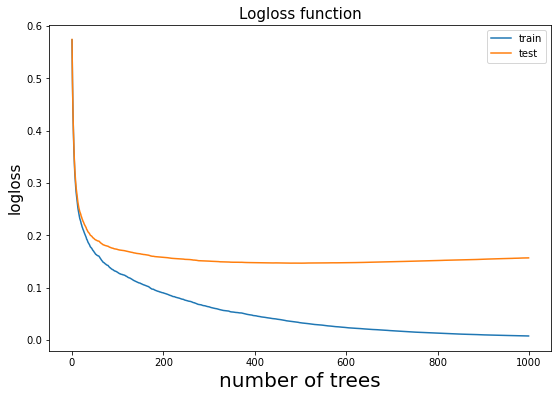

In [1]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import functions as fc
from xgboost import XGBClassifier



model = XGBClassifier()
model.load_model("/work/aavocone/models/under_mA3_1000.txt")
print(model.best_ntree_limit)


loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_1"]["logloss"]
plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "train")
plt.plot(x,loss_1, label = "test")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Undersampled", fontsize = 15)
plt.legend()

print(min(loss_1), loss_1[-1])

1000
0.173992 0.500671


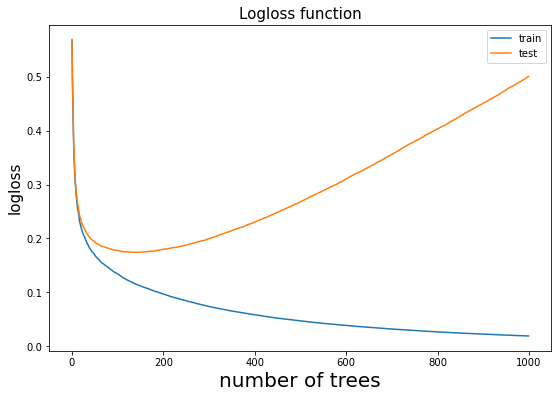

In [2]:
model.load_model("/work/aavocone/models/over_mA3_1000.txt")
print(model.best_ntree_limit)


loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_1"]["logloss"]
plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "train")
plt.plot(x,loss_1, label = "test")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Oversampled", fontsize = 15)
plt.legend()

print(min(loss_1), loss_1[-1])

500
0.006626 0.006626


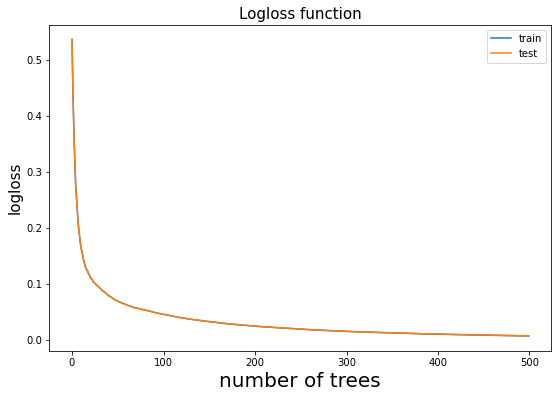

In [3]:
model.load_model("/ceph/aavocone/models/new_0_0_model500.txt")
print(model.best_ntree_limit)


loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_1"]["logloss"]
plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "train")
plt.plot(x,loss_1, label = "test")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function", fontsize = 15)
plt.legend()

print(min(loss_1), loss_1[-1])

500
0.043729 0.043729


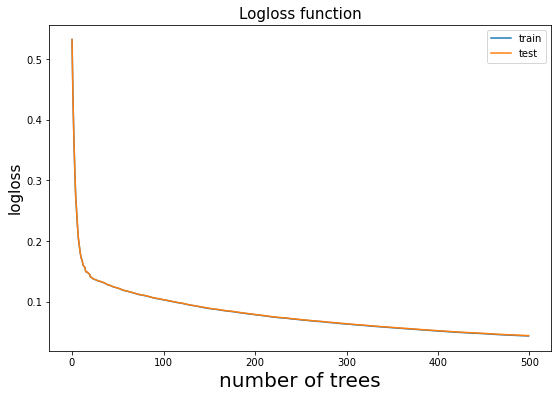

In [4]:
model.load_model("/ceph/aavocone/models/new_4_6_model500.txt")
print(model.best_ntree_limit)


loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_1"]["logloss"]
plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "train")
plt.plot(x,loss_1, label = "test")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function", fontsize = 15)
plt.legend()

print(min(loss_1), loss_1[-1])

# Comparing different model500 and model1000

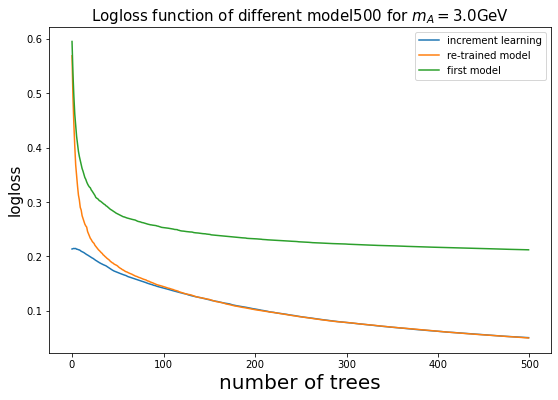

0.050653 0.050068 0.212149


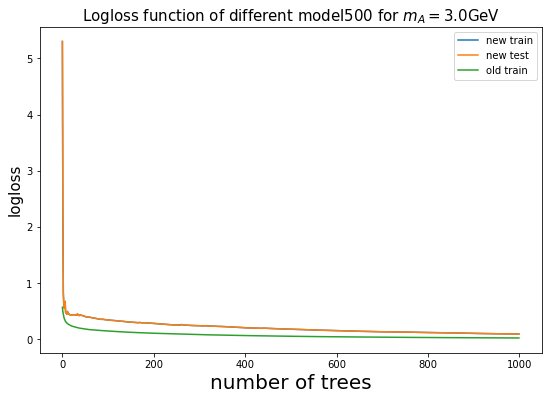

0.092854 0.092854 0.021798


In [25]:
model = XGBClassifier()
model.load_model("/work/aavocone/models/3_0_model500_increment_learning.txt")
loss_0 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/ceph/aavocone/models/3_0_model500.txt")
loss_1 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/work/aavocone/models/model500.txt")
loss_2 = model.evals_result()["validation_0"]["logloss"]


plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "increment learning")
plt.plot(x,loss_1, label = "re-trained model")
plt.plot(x,loss_2, label = "first model")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function of different model500 for $m_A = 3.0$GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/compare_model500.pdf", format="pdf",bbox_inches="tight")
plt.show()
print(min(loss_0), min(loss_1),min(loss_2))

model.load_model("/ceph/aavocone/models/3_0_model1000_validation.txt")
loss_0 = model.evals_result()["validation_0"]["logloss"]
loss_1 = model.evals_result()["validation_0"]["logloss"]

model.load_model("/ceph/aavocone/models/3_0_model1000.txt")
loss_2 = model.evals_result()["validation_0"]["logloss"]


plt.figure(figsize=(9,6))
x = range(len(loss_1))
plt.plot(x,loss_0, label = "new train")
plt.plot(x,loss_1, label = "new test")
plt.plot(x,loss_2, label = "old train")
plt.xlabel("number of trees", fontsize = 20)
plt.ylabel("logloss",fontsize=15)
plt.title(f"Logloss function of different model500 for $m_A = 3.0$GeV", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week9/compare_model500.pdf", format="pdf",bbox_inches="tight")
plt.show()
print(min(loss_0), min(loss_1),min(loss_2))






In [5]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt



df = pq.read_table(f"/ceph/aavocone/Datasets/3_small.parquet")
df = df.to_pandas()
model = XGBClassifier()
model.load_model("/ceph/aavocone/models/new_0_0_model500.txt")
X = df[df.columns[:-1]]   
y = df["signal"]    
print("Start predicting...")
yprob = model.predict_proba(X)[:,1]

Start predicting...


In [7]:
df = pq.read_table(f"/ceph/aavocone/Datasets/3_small.parquet")
df = df.to_pandas()
model = XGBClassifier()
model.load_model("/work/aavocone/models/model500.txt")
X = df[df.columns[:-1]]   
y = df["signal"]    
print("Start predicting...")
yprob = model.predict_proba(X)[:,1]

Start predicting...


In [4]:
df = pq.read_table(f"/ceph/aavocone/Datasets/3_small.parquet")
df = df.to_pandas()
model = XGBClassifier()
model.load_model("/ceph/aavocone/models/new_4_6_model500.txt")
X = df[df.columns[:-1]]   
y = df["signal"]    
print("Start predicting...")
yprob = model.predict_proba(X)[:,1]

Start predicting...
